# SEABORN

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

Documentação: https://seaborn.pydata.org/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Categóricos

In [36]:
sns.countplot?

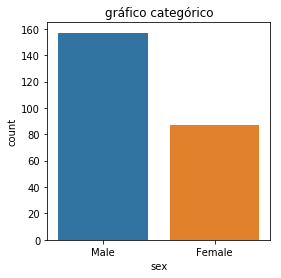

In [44]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=tips)
plt.title('gráfico categórico');

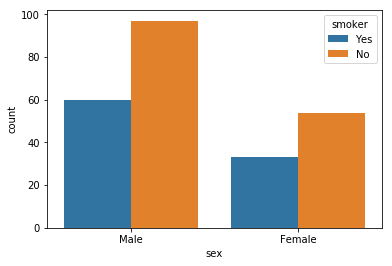

In [7]:
sns.countplot(x="sex", hue="smoker", data=tips)

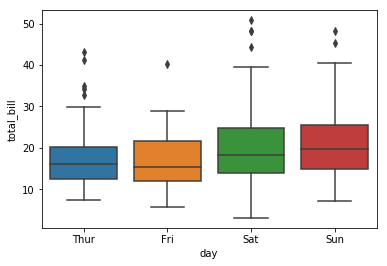

In [8]:
sns.boxplot(x="day", y="total_bill", data=tips)

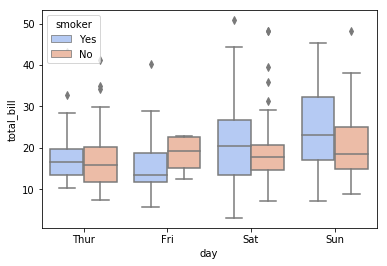

In [9]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

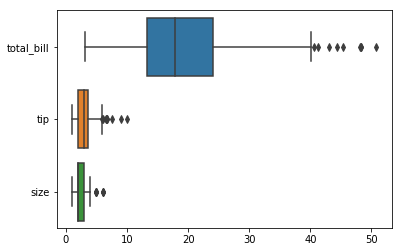

In [10]:
sns.boxplot(data=tips,orient='h')

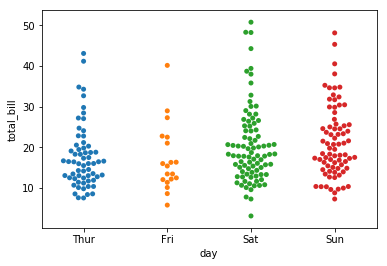

In [11]:
sns.swarmplot(x="day", y="total_bill", data=tips)

C:\Users\rodri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


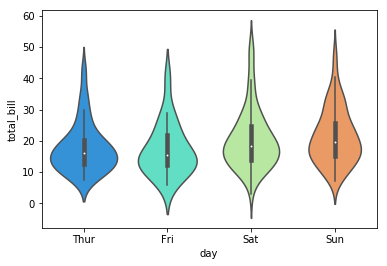

In [12]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

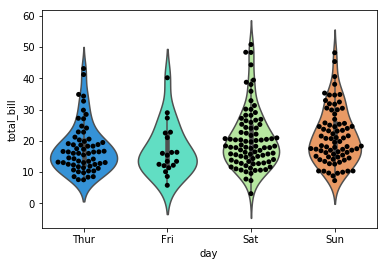

In [13]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')
sns.swarmplot(x="day", y="total_bill", data=tips,color='black',size=5)

#### Distribução de uma variável

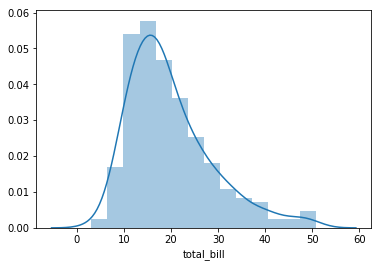

In [14]:
sns.distplot(tips['total_bill']);

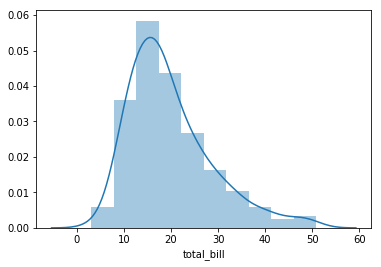

In [46]:
#Parametro "Bins"
sns.distplot(tips['total_bill'],bins=10);

#### Distribução entre variáveis

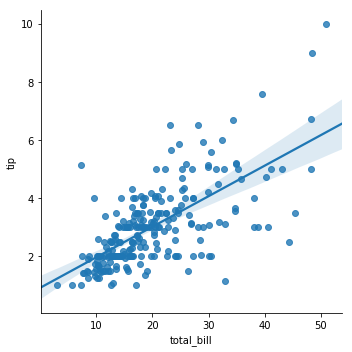

In [16]:
sns.lmplot(x='total_bill',y='tip',data=tips)

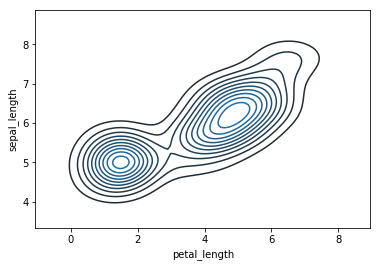

In [17]:
x = iris.petal_length
y = iris.sepal_length
sns.kdeplot(x, y)

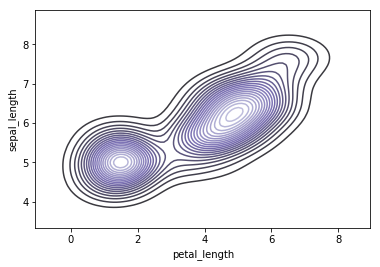

In [50]:
x = iris.petal_length
y = iris.sepal_length
sns.kdeplot(x, y, n_levels=20, cmap="Purples_d")

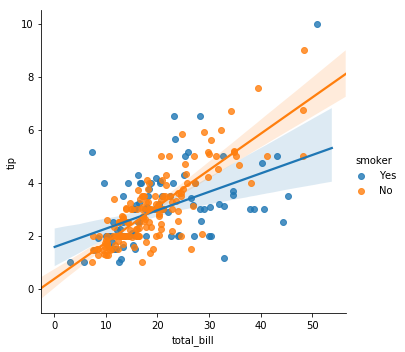

In [19]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='smoker')

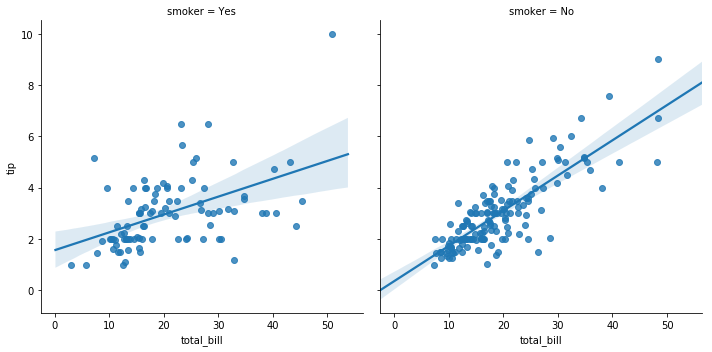

In [20]:
sns.lmplot(x="total_bill", y="tip", col="smoker",data=tips)

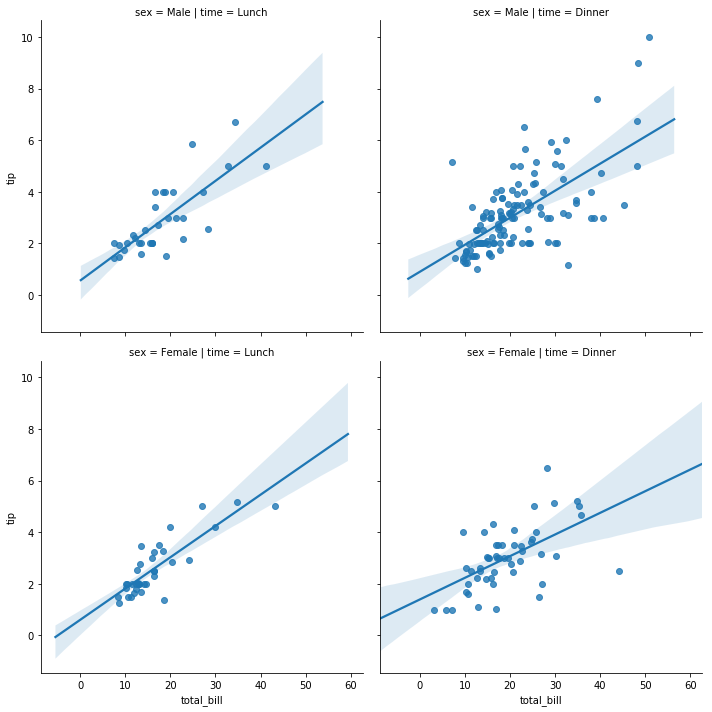

In [21]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

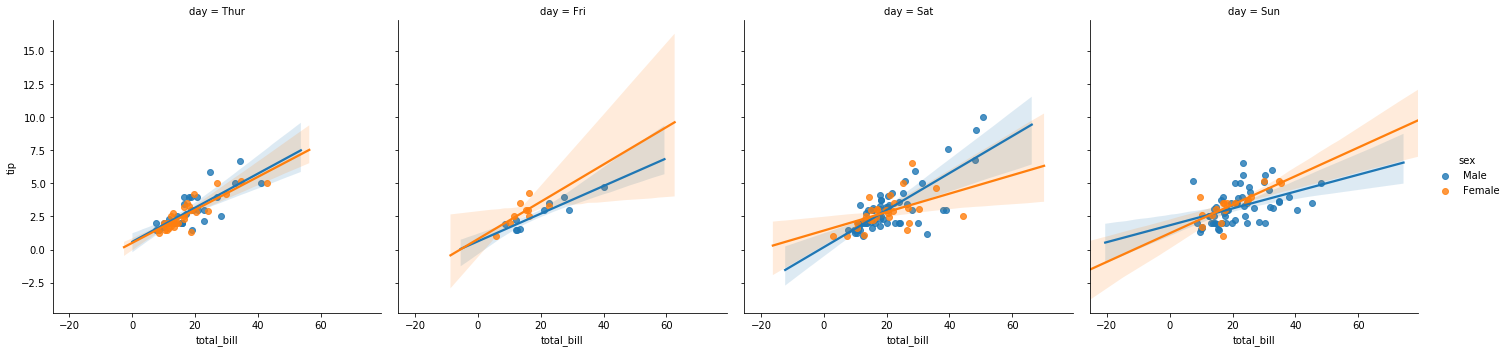

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

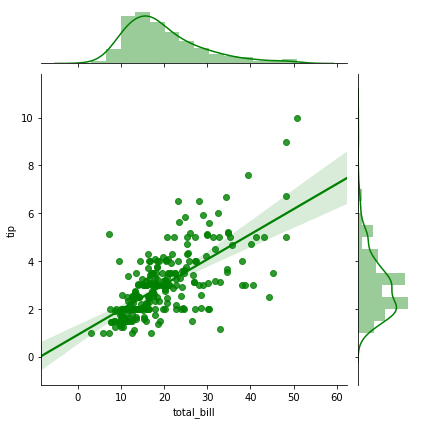

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg', color='g');

### PairGrid / PairPlot

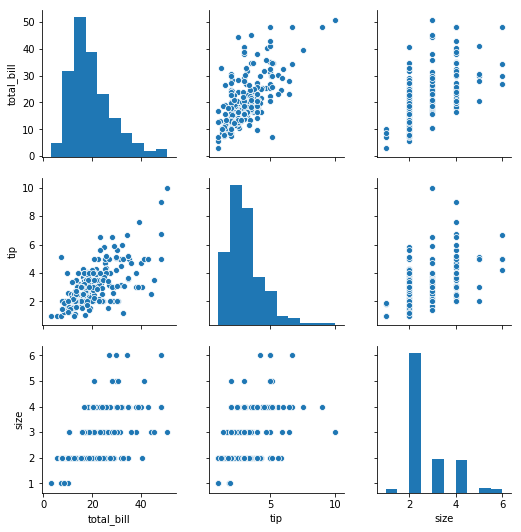

In [24]:
sns.pairplot(tips)

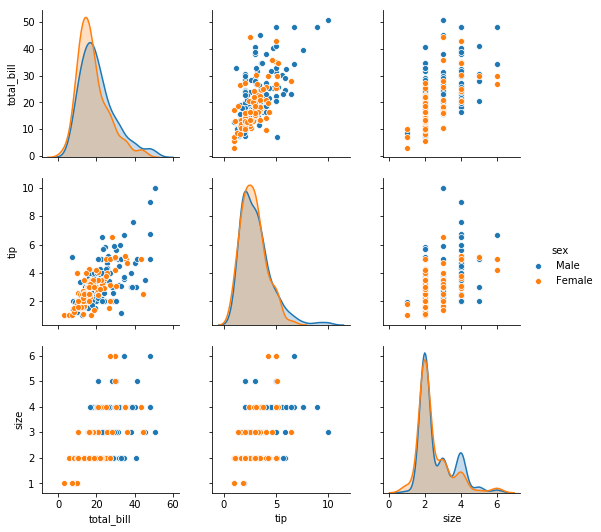

In [25]:
sns.pairplot(tips, hue='sex')

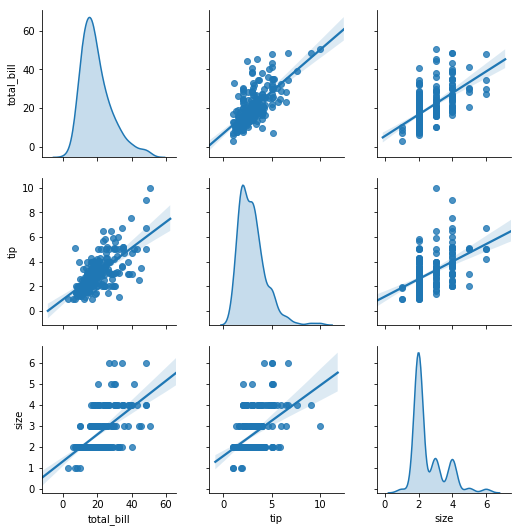

In [26]:
sns.pairplot(tips, diag_kind="kde", kind="reg")

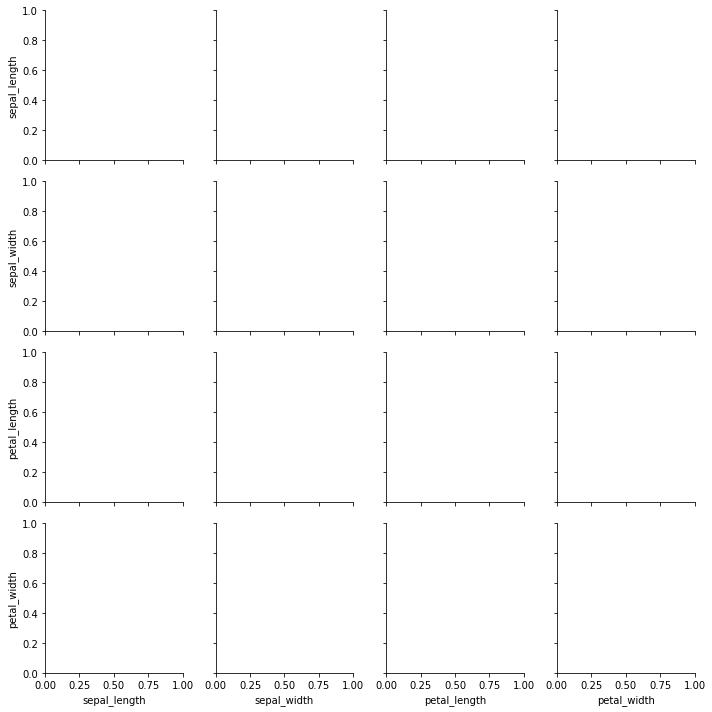

In [27]:
sns.PairGrid(iris)

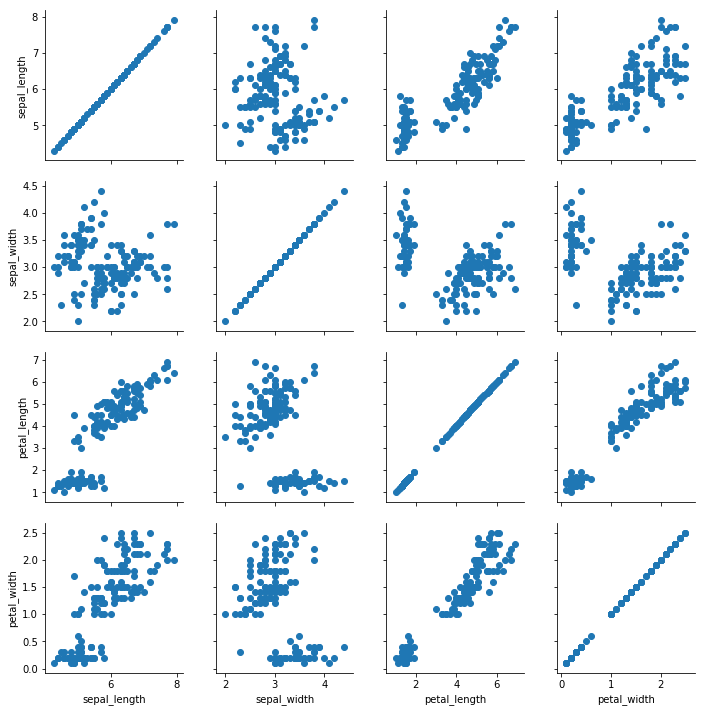

In [28]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

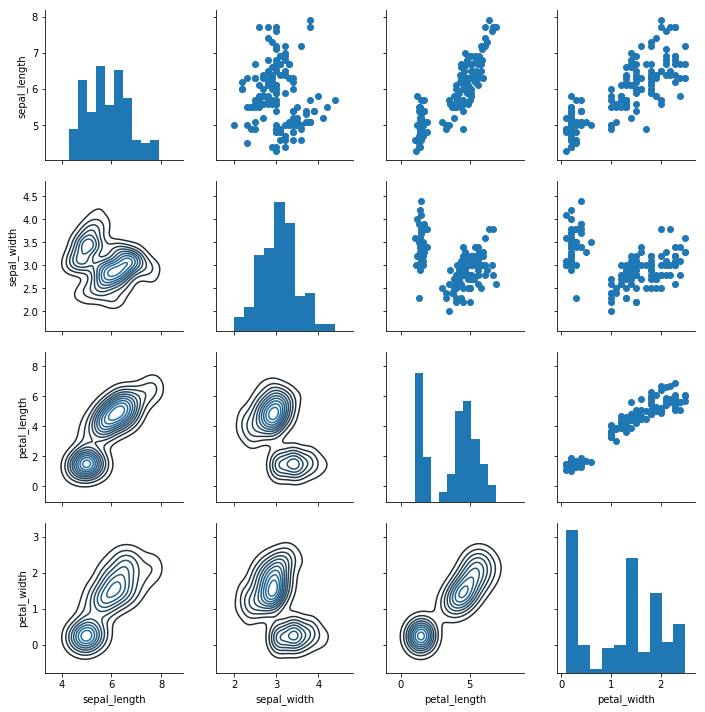

In [29]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

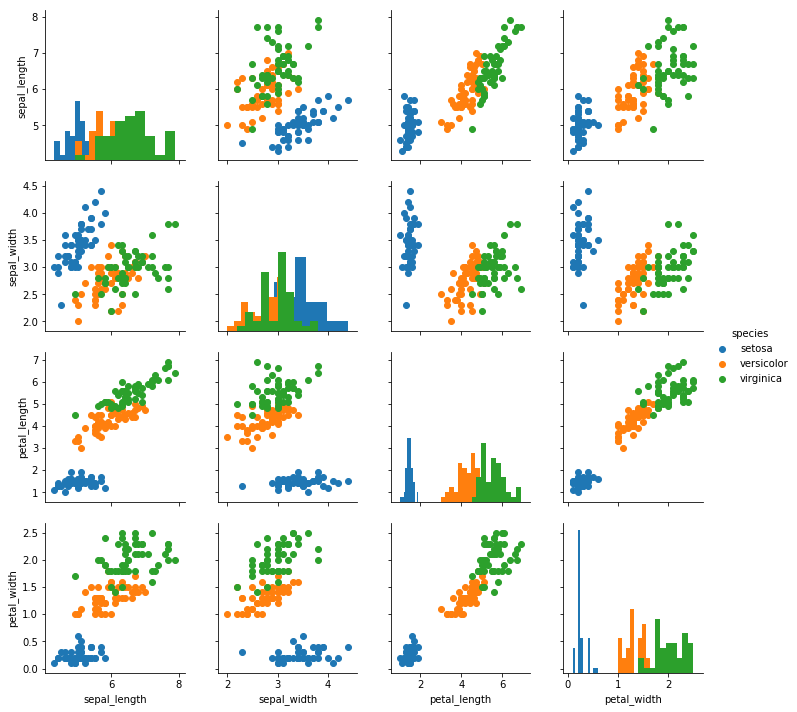

In [30]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

### Matricial

In [31]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


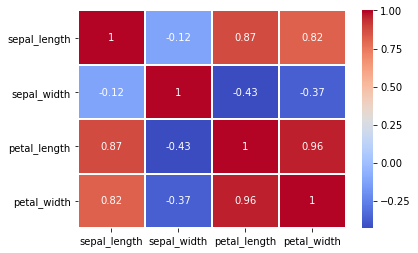

In [32]:
sns.heatmap(corr,cmap='coolwarm',linecolor='white',linewidths=1, annot=True)

In [33]:
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


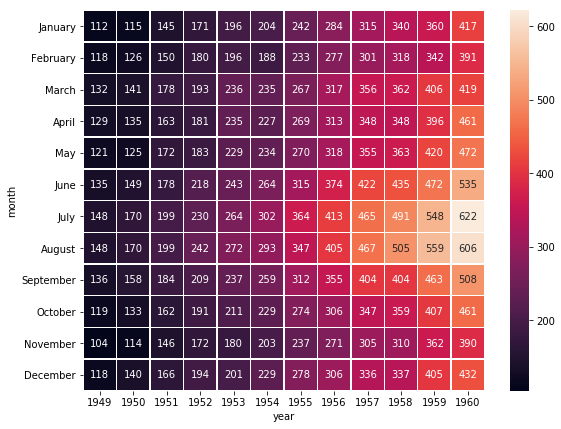

In [34]:
plt.figure(figsize=(9,7))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5);

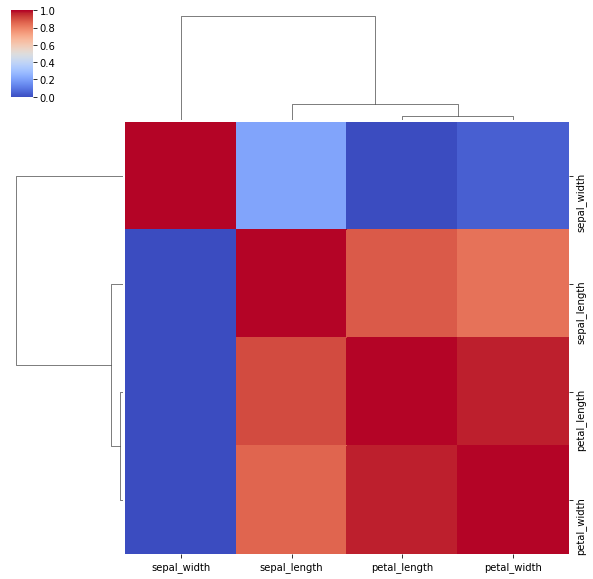

In [35]:
sns.clustermap(corr,cmap='coolwarm',standard_scale=5)